In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole

In [2]:
import csv
with open('chembl_thrombin_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    thrombin_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

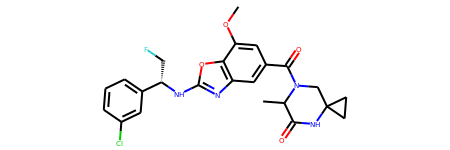

In [3]:
thrombin_ligands[3141]

In [4]:
Chem.GetSSSR(thrombin_ligands[3141])

5

In [5]:
Chem.CalcNumRotatableBonds(thrombin_ligands[3141])

6

In [6]:
thrombin_ligands[3141].GetNumHeavyAtoms()

34

In [7]:
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(thrombin_ligands[3141]), rdescriptors.CalcNumLipinskiHBD(thrombin_ligands[3141])

(8, 2)

In [8]:
rdescriptors.CalcExactMolWt(thrombin_ligands[3141])

486.147011148

In [9]:
rdescriptors.CalcTPSA(thrombin_ligands[3141])

96.7

In [10]:
thrombin_rings = [Chem.GetSSSR(l) for l in thrombin_ligands]
thrombin_rotatable = [Chem.CalcNumRotatableBonds(l) for l in thrombin_ligands]
thrombin_atomcount = [l.GetNumHeavyAtoms() for l in thrombin_ligands]
thrombin_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in thrombin_ligands]
thrombin_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in thrombin_ligands]
thrombin_molwt = [rdescriptors.CalcExactMolWt(l) for l in thrombin_ligands]
thrombin_tpsa = [rdescriptors.CalcTPSA(l) for l in thrombin_ligands]
thrombin_logp = [Descriptors.MolLogP(l) for l in thrombin_ligands]

In [11]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)})

In [12]:
df = pd.DataFrame(data={'set':'thrombin', 'rings': thrombin_rings,
                        'rotatable': thrombin_rotatable, 'atoms': thrombin_atomcount,
                        'hba': thrombin_hba, 'hbd': thrombin_hbd, 'molwt': thrombin_molwt,
                        'tpsa': thrombin_tpsa, 'logp': thrombin_logp})
df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,thrombin,4,8,37,11,6,530.231139,168.92,0.19167
1,thrombin,4,12,43,8,4,577.257671,123.73,5.49857
2,thrombin,4,10,36,9,5,481.222623,138.78,2.56037
3,thrombin,3,13,37,8,5,522.251002,125.89,4.93497
4,thrombin,4,10,36,8,5,480.227374,125.89,3.16537
...,...,...,...,...,...,...,...,...,...
3231,thrombin,3,9,36,11,8,511.173480,189.21,2.26487
3232,thrombin,3,9,35,12,0,545.987857,181.53,-3.81708
3233,thrombin,4,10,41,12,0,622.019157,181.53,-2.56308
3234,thrombin,5,14,48,13,0,690.138306,173.00,2.89292


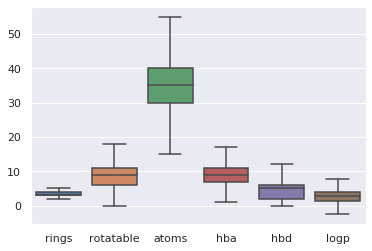

In [13]:
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

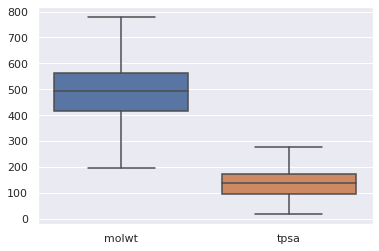

In [14]:
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False)

In [15]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [18:23:38] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [18:23:38] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [18:23:38] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [18:23:38] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [18:23:38] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [18:23:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:23:38] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [18:23:38] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:23:38] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [18:23:38] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [18:23:38] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [18:23:38] Can't kek

RDKit ERROR: [18:23:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [18:23:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:23:39] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [18:23:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:23:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [18:23:39] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [18:23:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [18:23:39] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [18:23:39] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [18:23:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [18:23:39] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [18:23:39] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [18:23:40] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [18:23:40] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [18:23:40] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [18:23:40] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [18:23:40] ERROR: Could not sanitize molecule ending on line 1151592


7113

In [16]:
drugbank_rings = [Chem.GetSSSR(l) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

In [17]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp})
df_drugbank

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...
7108,drugs,1,0,8,1,1,128.002892,20.23,2.04560
7109,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
7110,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
7111,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [18]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,thrombin,4,8,37,11,6,530.231139,168.92,0.19167
1,thrombin,4,12,43,8,4,577.257671,123.73,5.49857
2,thrombin,4,10,36,9,5,481.222623,138.78,2.56037
3,thrombin,3,13,37,8,5,522.251002,125.89,4.93497
4,thrombin,4,10,36,8,5,480.227374,125.89,3.16537
...,...,...,...,...,...,...,...,...,...
10344,drugs,1,0,8,1,1,128.002892,20.23,2.04560
10345,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
10346,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
10347,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [19]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

,set,variable,value
0,thrombin,rings,4.0000
1,thrombin,rings,4.0000
2,thrombin,rings,4.0000
3,thrombin,rings,3.0000
4,thrombin,rings,4.0000
...,...,...,...
62089,drugs,logp,2.0456
62090,drugs,logp,-1.3227
62091,drugs,logp,1.5471
62092,drugs,logp,-0.0003


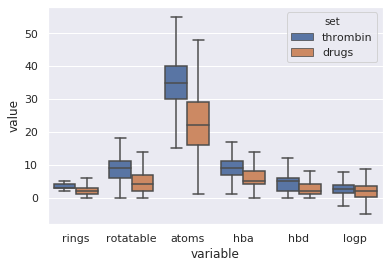

In [20]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False)

Jak bylo řečeno už v předešlém cvičení, počet kruhů v mém datasetu a DrugBance se liší ve prospěch thrombinového setu. Tento rozdíl jsem však už prve prohlásil za náhodný, neb DrugBank je nahodilý soubor dat a nic moc z něho nemohu vyvodit (doufám, že se nemýlím :-) ).

Co rotovatelných vazeb se týče, jsem trochu překvapený - čekal jsem jistou korelaci vyššího počtu kruhů (eventuelně aromatických) s nižším počtem rotovatelných vazeb (právě kvůli té aromaticitě a sp2 hybridizaci).

Jako důvod vyššího počtu atomů v thrombinovém setu mě napadá především to, že thrombin je proteáza, má tedy afinitu k velkému množství (oligo)peptidů, které lze ostatně najít i v datasetu samotném. Platí tedy "velké molekuly = mnoho atomů".

Vztah akceptorů a donorů v obou setech je vcelku podobný. V obou převládá thrombinový set, což bych připsal na vruh velikosti molekul, tedy větší pravděpodobnosti na bohatost právě na tyto interakce.

Partiční koeficienty jsou si vcelku podobné, což bych očekával - v obou případech se má jednat o biologicky aktivní látky a jejich chování v rozpouštědlech (a především pak ve fyziologickém prostředí) bych tedy předpokládal podobné.

In [21]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,thrombin,molwt,530.231139
1,thrombin,molwt,577.257671
2,thrombin,molwt,481.222623
3,thrombin,molwt,522.251002
4,thrombin,molwt,480.227374
...,...,...,...
20693,drugs,tpsa,20.230000
20694,drugs,tpsa,149.820000
20695,drugs,tpsa,403.100000
20696,drugs,tpsa,83.500000


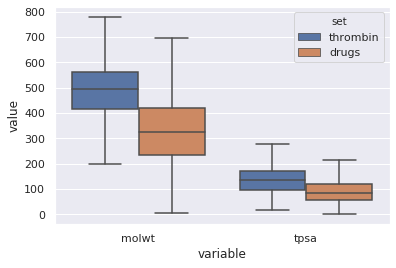

In [22]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False)

Rozdíly v molekulových hmotách budou pravděpodobně způsobeny stejnými vlivy, jako počty atomů nahoře (obecně většími molekulami interagujícími s thrombinem - peptidy a tak podobně).

Co TPSA se týče, tady mě napadá především to, že významná část nízkomolekulárních léčiv jsou malé relativně hydrofobní molekuly, zatímco peptide-like molekuly (a proteiny) jsou hydrofilnější.

In [23]:
thrombin_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in thrombin_ligands]
drugbank_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in drugs]
thrombin_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                           for l in thrombin_ligands if rdescriptors.CalcNumRings(l)]
drugbank_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                               for l in drugs if rdescriptors.CalcNumRings(l)]

In [25]:
df = pd.DataFrame(data=[{'set': 'thrombin', 'variable': 'heteroatom_ratio', 'value': x}
                        for x in thrombin_heteroatoms_ratio])
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heteroatom_ratio', 'value': x}
                                  for x in drugbank_heteroatoms_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'thrombin', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in thrombin_heterocycles_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in drugbank_heterocycles_ratio]), ignore_index=True)
df

,set,variable,value
0,thrombin,heteroatom_ratio,0.324324
1,thrombin,heteroatom_ratio,0.186047
2,thrombin,heteroatom_ratio,0.250000
3,thrombin,heteroatom_ratio,0.243243
4,thrombin,heteroatom_ratio,0.222222
...,...,...,...
19694,drugbank,heterocycle_ratio,0.000000
19695,drugbank,heterocycle_ratio,0.000000
19696,drugbank,heterocycle_ratio,0.666667
19697,drugbank,heterocycle_ratio,0.500000


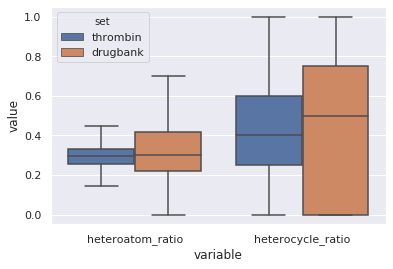

In [26]:
sns.boxplot(y='value', x='variable', hue='set', data=df, showfliers=False)

Zastoupení heterocyklů a heteroatomů mě trochu překvapilo - očekával jsem jakous takous korelaci s hba a hbd, nicméně se obě hodnoty dost podobají jedna druhé.